# Amazon Textract
Amazon Textract es un servicio de Machine Learning que puede extraer el texto de documentos escaneados automáticamente. Va más allá de un OCR (reconocimiento óptico de caracteres) al buscar identificar, comprender y extraer datos de formularios y tablas.
Textract también puede procesar escritura a mano, y adicionalmente pueden agregarse revisiones humanas con Amazon Augmented AI para supervisar la información del modelo y aumentar la precisión del flujo automático.

Se puede hacer uso de las acciones de Textract a través del API, en este notebook exploraremos cada una para poder analizar los resultados.

1. [Detect Document Text](#detect_document_text)
2. [Analyze Document](#analyze_document)
3. [Analyze Expense](#analyze_expense)
4. [Analyze ID](#analyze_id)

In [23]:
!python -m pip install amazon-textract-response-parser

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install boto3==1.25.4

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached boto3-1.25.4-py3-none-any.whl (132 kB)
  Using cached botocore-1.28.4-py3-none-any.whl (9.3 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.27.96
    Uninstalling botocore-1.27.96:
      Successfully uninstalled botocore-1.27.96
  Attempting uninstall: boto3
    Found existing installation: boto3 1.24.96
    Uninstalling boto3-1.24.96:
      Successfully uninstalled boto3-1.24.96
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.25.97 requires botocore==1.27.96, but you have botocore 1.28.4 which is incompatible.
aiobotocore 2.0.1 requires botocore<1.22.9,>=1.22.8, but you have botocore 1.28.4 which is incompatible.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgra

In [44]:
!python -m pip install amazon-textract-prettyprinter

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.8.9
    Uninstalling tabulate-0.8.9:
      Successfully uninstalled tabulate-0.8.9
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [36]:
import boto3
from trp import Document
from PIL import Image, ImageDraw, ExifTags, ImageColor, ImageFont
import io
import json
textract = boto3.client("textract", region_name='us-east-1')

In [6]:
pip show boto3

Name: boto3
Version: 1.25.4
Summary: The AWS SDK for Python
Home-page: https://github.com/boto/boto3
Author: Amazon Web Services
Author-email: 
License: Apache License 2.0
Location: /home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages
Requires: botocore, jmespath, s3transfer
Required-by: s3fs, sagemaker, smclarify, smdebug
Note: you may need to restart the kernel to use updated packages.


## 1. Detect Document Text <a id="detect_document_text">
Detecta texto en el documento ingresado. Amazon Textract puede detectar lineas de texto y palabras que conforman una línea de texto. El documento de entrada tiene que tener uno de los siguientes formatos de imagen: JPEG, PNG, PDF, o TIFF. DetectDocumentText devuelve el texto detectado un array de objetos de bloque. Esta acción es un tipo de acción *sync* es decir que se espera una respuesta inmediata, versus las acciones *async* que forman como post-procesado. Detect Document Text puede analizar documentos PDF de una sola página, para analizar documentos PDF de más de una página debe emplearse el Start Document Text Detection que funciona de forma *async*

In [7]:
# Documento
documentName = "./img/detect_document_text.png"

with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

response = textract.detect_document_text(Document={'Bytes': imageBytes})

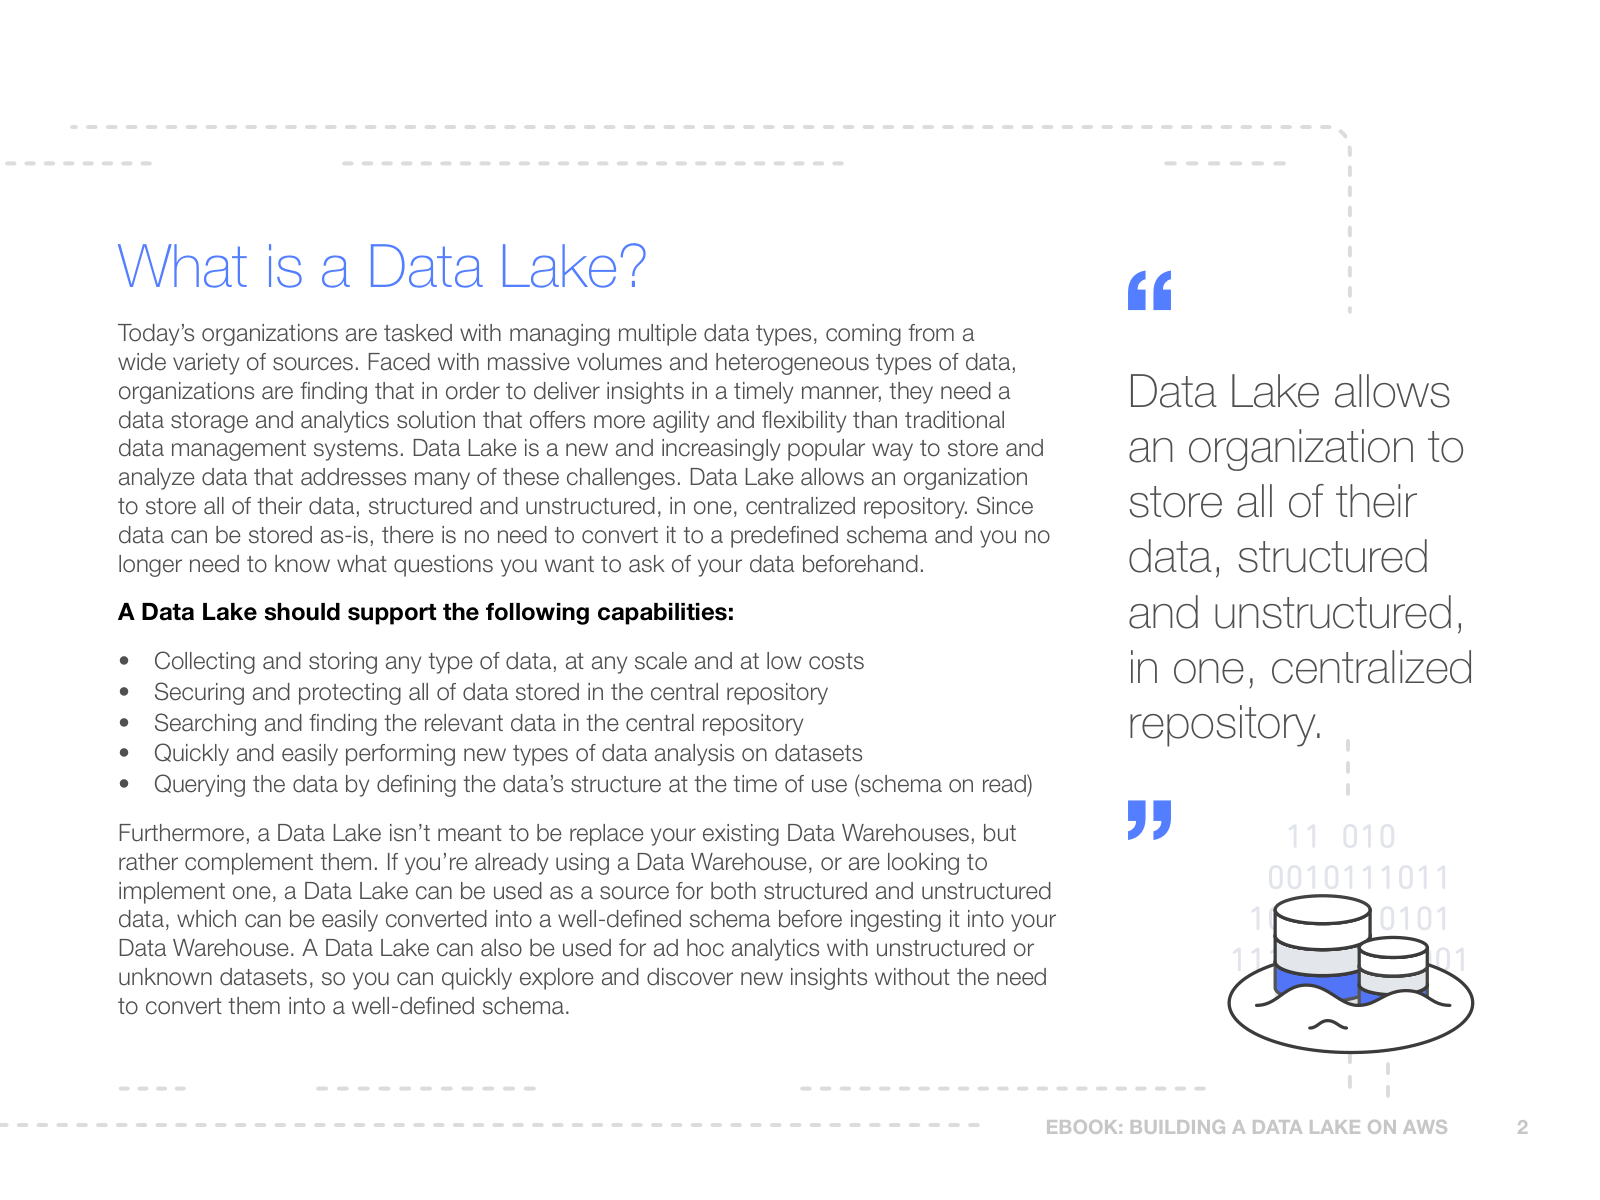

In [8]:
image = Image.open(documentName)
draw = ImageDraw.Draw(image)
image.show()

In [9]:
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print ('\033[94m' +  item["Text"] + '\033[0m')

What is a Data Lake?
"
Today's organizations are tasked with managing multiple data types, coming from a
wide variety of sources. Faced with massive volumes and heterogeneous types of data,
organizations are finding that in order to deliver insights in a timely manner, they need a
Data Lake allows
data storage and analytics solution that offers more agility and flexibility than traditional
data management systems. Data Lake is a new and increasingly popular way to store and
an organization to
analyze data that addresses many of these challenges. Data Lake allows an organization
to store all of their data, structured and unstructured, in one, centralized repository. Since
store all of their
data can be stored as-is, there is no need to convert it to a predefined schema and you no
longer need to know what questions you want to ask of your data beforehand.
data, structured
A Data Lake should support the following capabilities:
and unstructured,
in one, centralized
Securing and protecting 

## 2. Analyze Document<a id="analyze_document">
Analiza un documento de entrada para buscar relaciones entre los items detectados.
Analyze document puede retornar lo siguiente:
* Data de formularios: La información relacionada es retornada en dos bloques de objetos, cada una en pares de key-value. Por ejemplo "nombre" y "María José".
* Tabla y datos de tabla: Un objeto *Table Block* contiene información sobre una tabla detectada. Un objeto *Cell block* es retornado para cada celda en una tabla.
* Líneas y palabras: Un *Line object* contiene uno o más *Word block object*. Todas las líneas y palabras que son detectadas en un documento son retornadas.
* Query: Un *query block object* contiene un query text, alias y un enlace asociado a los *query results*
* Query result: Un *query result block object* contiene la respuesta a la query y un ID que conecta el resultado a la query realizada. Este bloque también contiene un valor de confianza.

In [24]:
#Formularios
documentName = "./img/analyze_document_form.jpg"

with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

response = textract.analyze_document(
    Document={
        'Bytes': imageBytes
    },
    FeatureTypes=[
        'FORMS'
    ]
)

In [25]:
doc = Document(response)
for page in doc.pages:
    for field in page.form.fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

Key: Parientes, Value: SELECTED
Key: Permanece a algún Club Social O Deportivo?, Value: NO
Key: Padres, Value: NOT_SELECTED
Key: Apellido Materno, Value: Rodriguez
Key: Nombre(s), Value: Alma María
Key: Apellido Paterno, Value: Perez
Key: Cónyuge, Value: NOT_SELECTED
Key: Colonia, Value: Tabacalera
Key: Su familia, Value: NOT_SELECTED
Key: Clase y Número de Licencia, Value: Tipo A
Key: Otros, Value: SELECTED
Key: Sueldo Mensual Aprobado, Value: 4000. 09
Key: Numero de Seguridad Social, Value: Pon tu número si lo tienes
Key: Domicilio, Value: Av. Insurgentes 1658 int 12
Key: Edad, Value: 26 Años
Key: Casado, Value: NOT_SELECTED
Key: ¿Cual es su pasatiempo favorito?, Value: Cosinar
Key: Práctica Ud. Algún Deporte?, Value: Gimnacia
Key: Clave Única de Registro de Población, Value: RO P A M HGOLGC06
Key: Ciudad, Estado, Value: Soltera
Key: Otro, Value: NOT_SELECTED
Key: Malo, Value: NOT_SELECTED
Key: Sus padres, Value: NOT_SELECTED
Key: Solo, Value: NOT_SELECTED
Key: Reg. Fed. De Contribuy

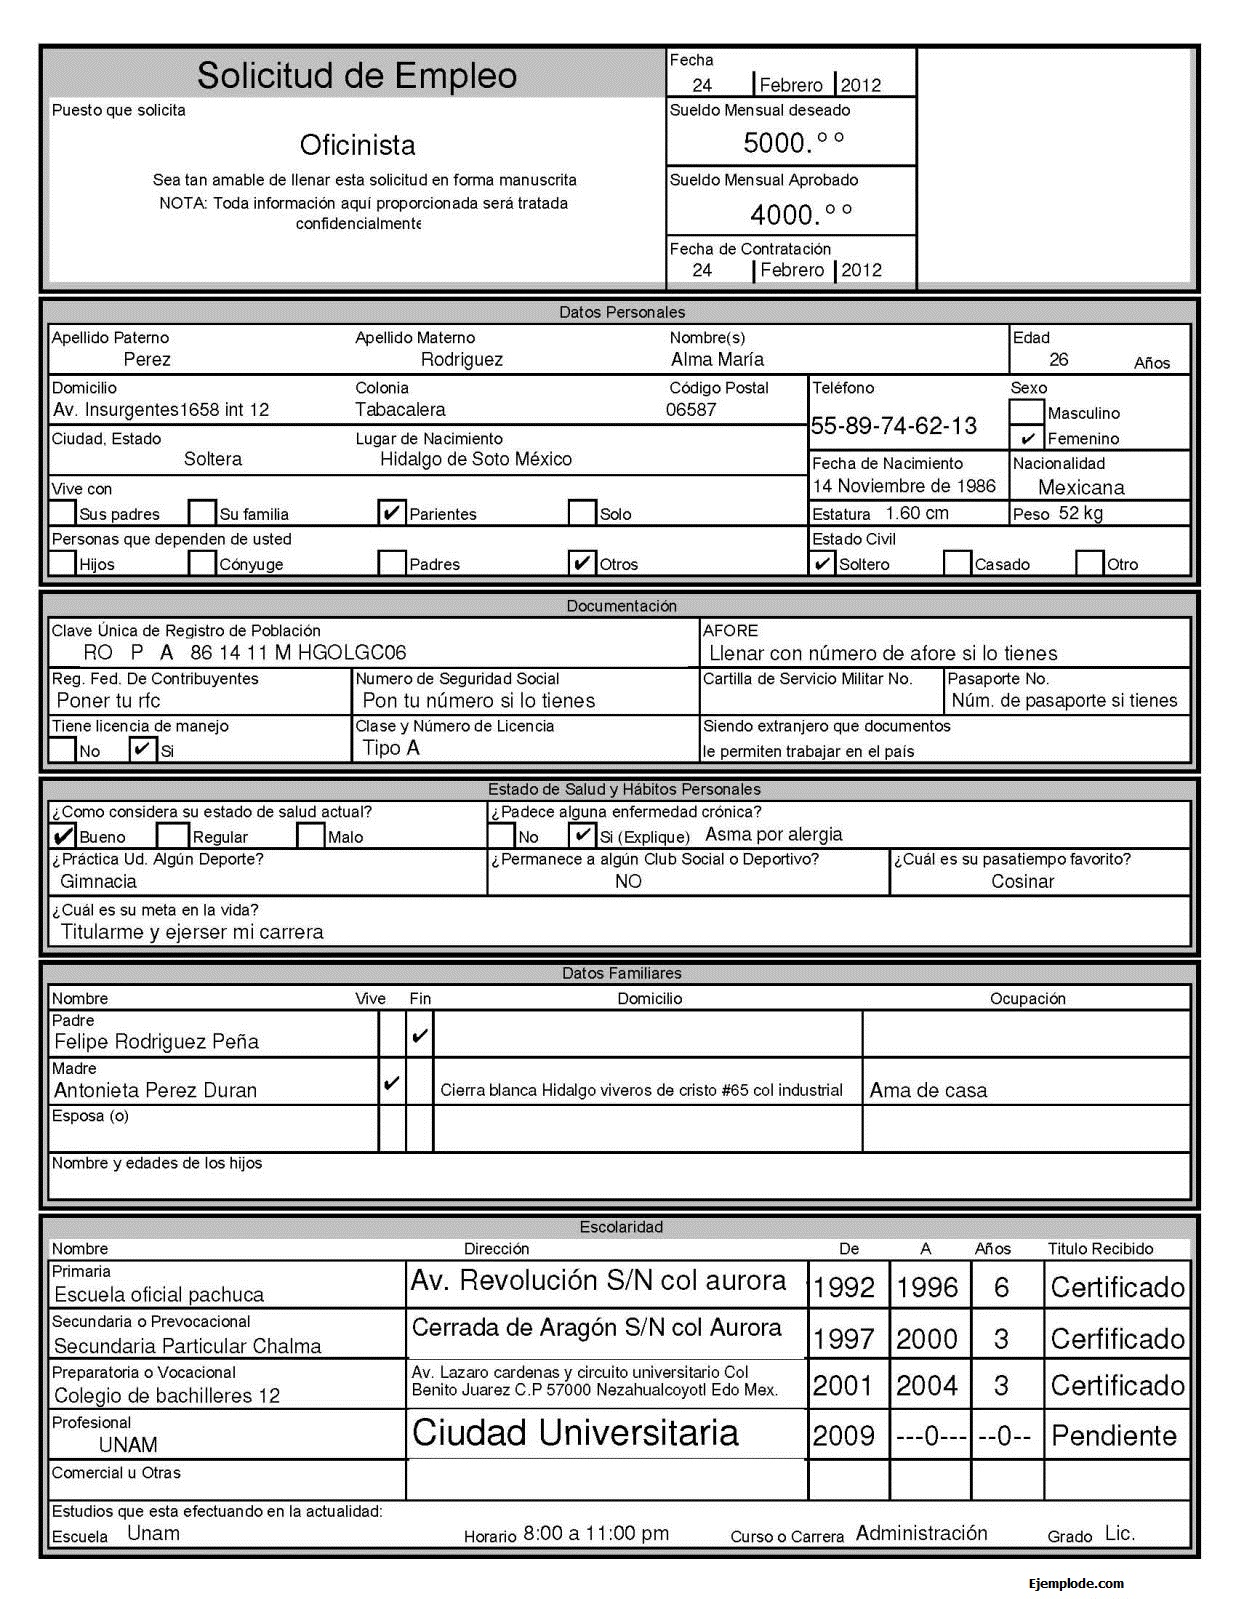

In [12]:
image = Image.open(documentName)
draw = ImageDraw.Draw(image)
image.show()

In [21]:
# Tablas
documentName = "./img/analyze_document_table.jpg"

with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

response = textract.analyze_document(
    Document={
        'Bytes': imageBytes
    },
    FeatureTypes=[
        'TABLES'
    ]
)

In [22]:
doc = Document(response)

for page in doc.pages:
    for table in page.tables:
        for r, row in enumerate(table.rows):
            for c, cell in enumerate(row.cells):
                print("Table[{}][{}] = {}".format(r, c, cell.text))

Table[0][0] = Servicios 
Table[0][1] = Cantidad 
Table[0][2] = Unidad de Medida 
Table[0][3] = Arancel (Q.) 
Table[0][4] = Total (Q.) 
Table[1][0] = 5.4.1 Reimpresión de evaluación de conformidad 
Table[1][1] = 
Table[1][2] = Producto 
Table[1][3] = 50.00 
Table[1][4] = 
Table[2][0] = 5.4.2 Solvencia para participar en contrato abierto 
Table[2][1] = 
Table[2][2] = Solvencia 
Table[2][3] = 50.00 
Table[2][4] = 
Table[3][0] = 5.4.3 Reimpresión de formulario 63A 
Table[3][1] = 
Table[3][2] = Formulario 
Table[3][3] = 50.00 
Table[3][4] = 
Table[4][0] = 5.4.4 Análisis de muestras particulares medicamentos 
Table[4][1] = 
Table[4][2] = Análisis 
Table[4][3] = 
Table[4][4] = 
Table[5][0] = 5.4.5 Análisis de productos por extensiones 
Table[5][1] = 
Table[5][2] = Análisis 
Table[5][3] = 100.00 
Table[5][4] = 
Table[6][0] = 5.4.6 Análisis de producto por extensión alimentos 
Table[6][1] = 
Table[6][2] = Análisis 
Table[6][3] = 100.00 
Table[6][4] = 
Table[7][0] = 5.4.7 Análisis de laboratorio

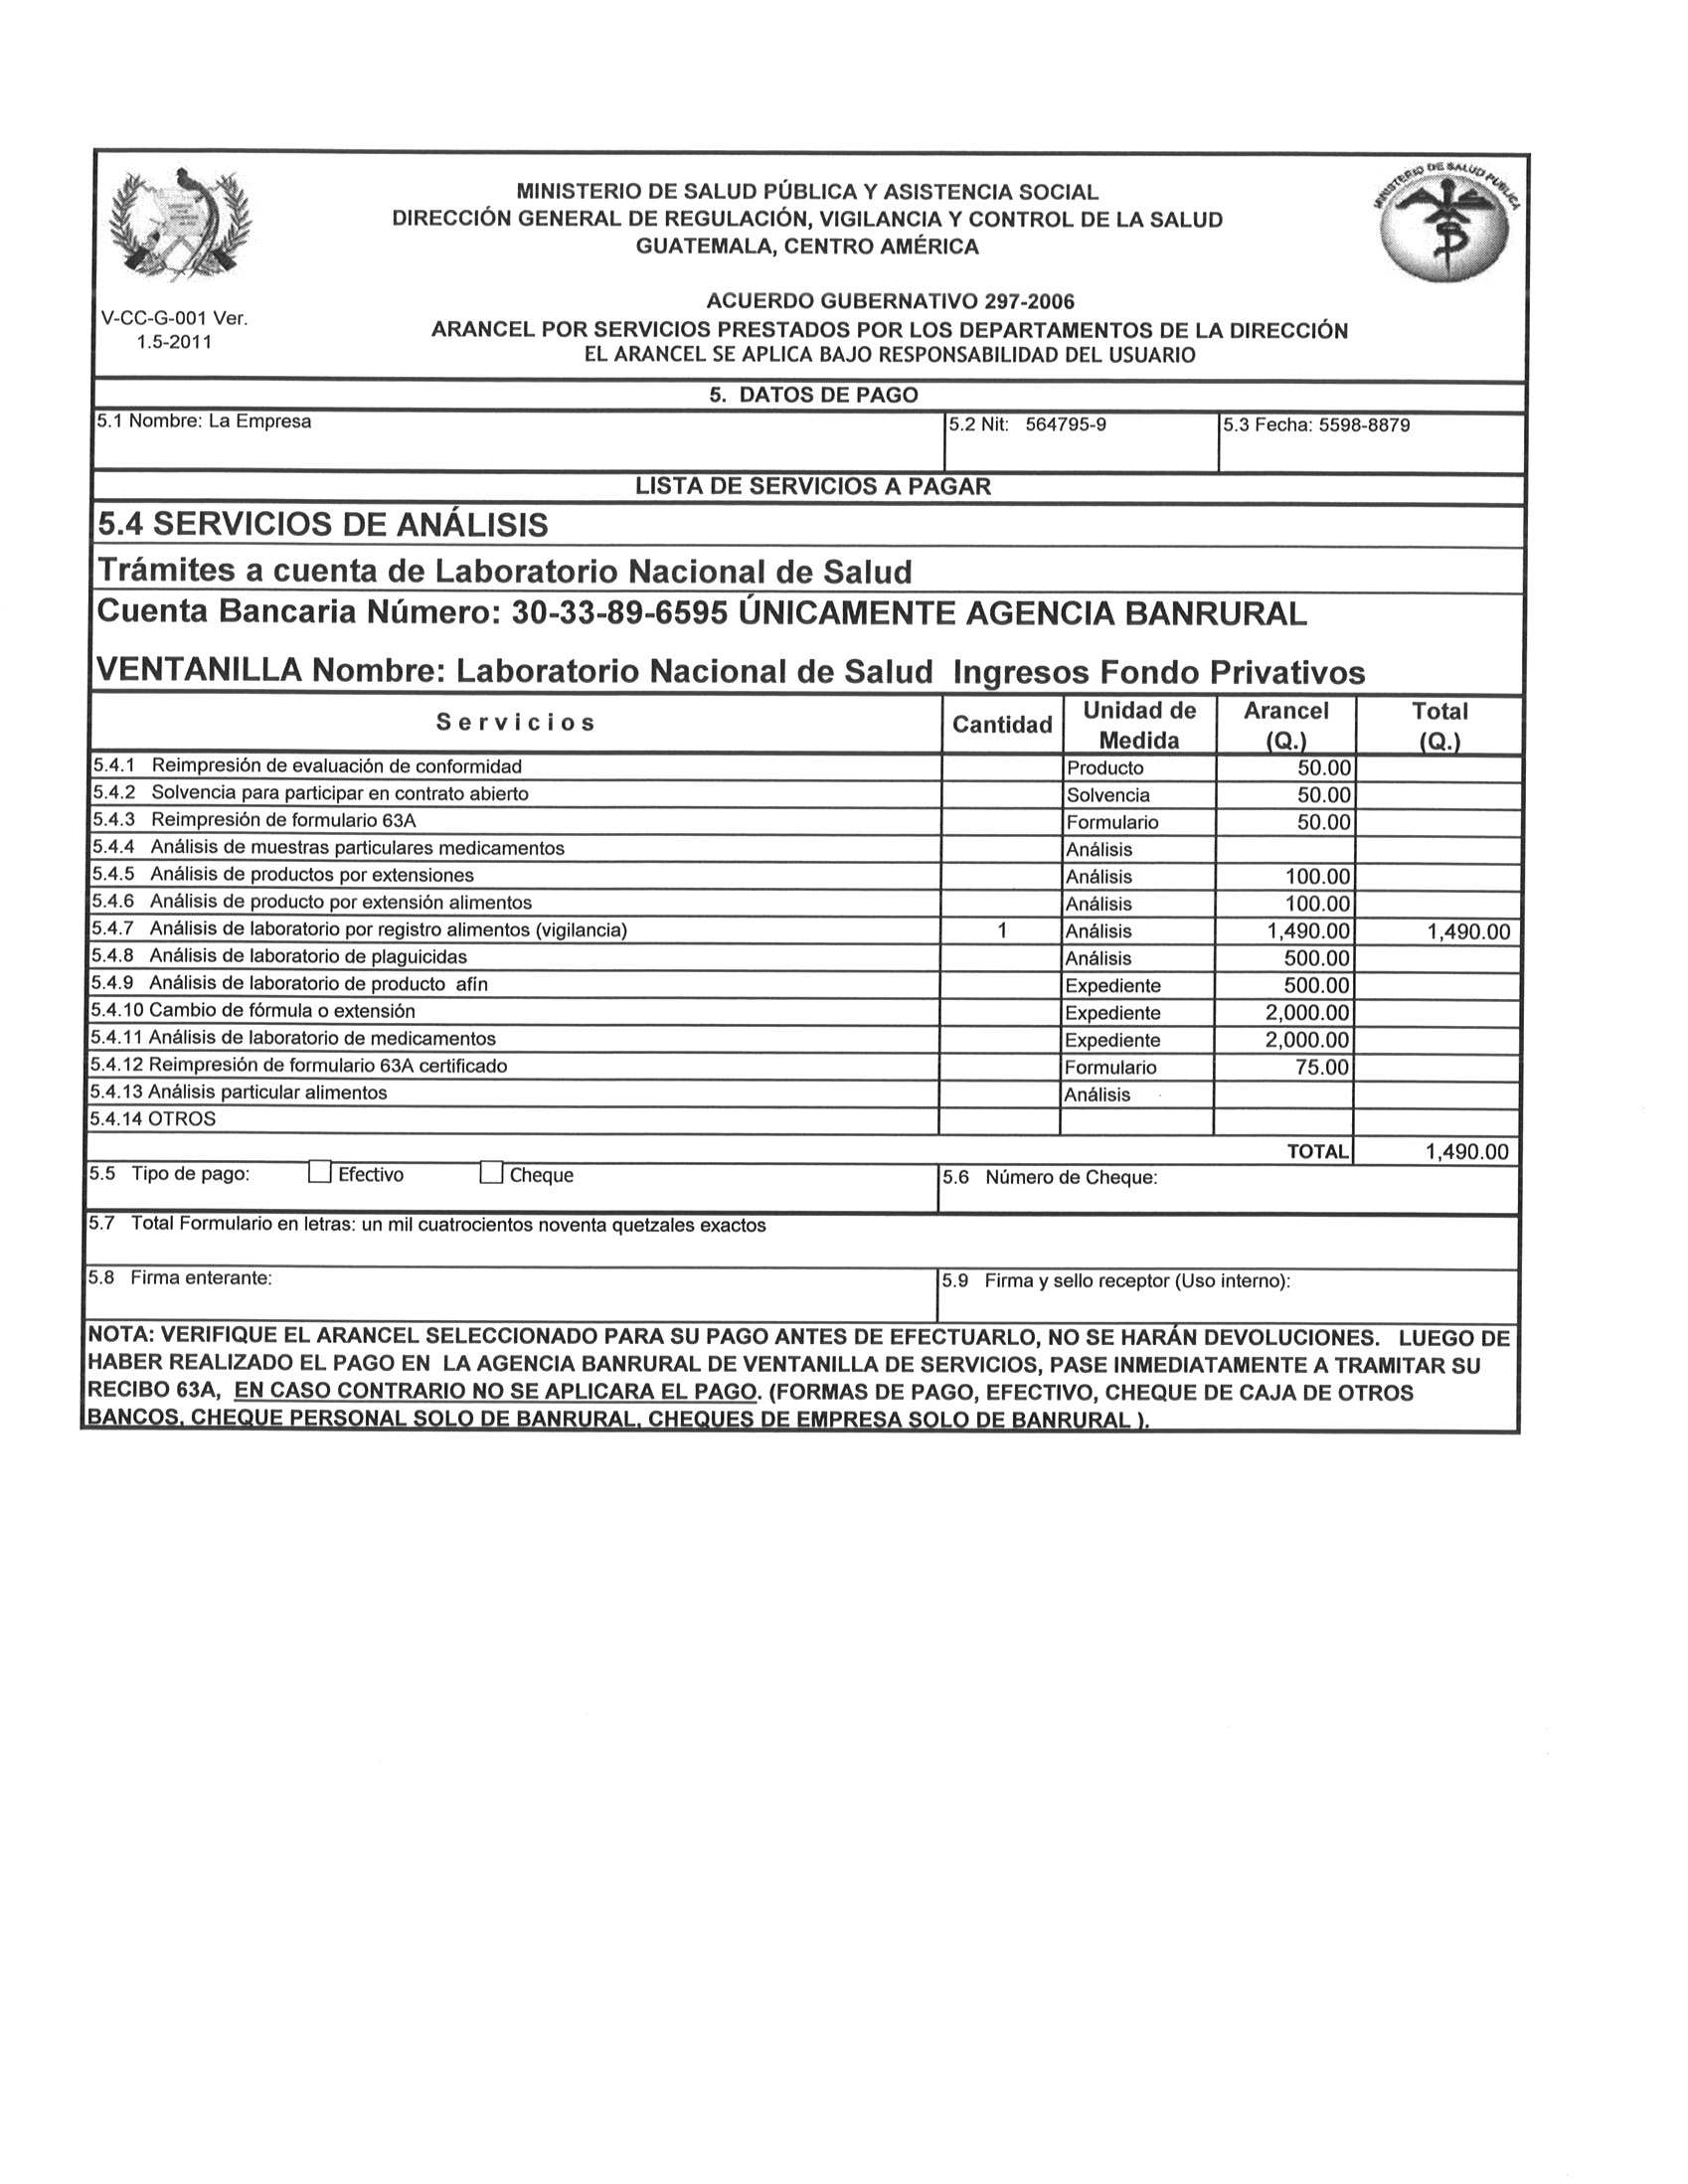

In [15]:
image = Image.open(documentName)
draw = ImageDraw.Draw(image)
image.show()

In [29]:
# Query
documentName = "./img/analyze_document_query.jpg"

with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

response = textract.analyze_document(
    Document={
        'Bytes': imageBytes
    },
    FeatureTypes=[
        'QUERIES','FORMS'
    ],
    QueriesConfig={
        'Queries': [
            {
                'Text': 'Cual es la edad de la persona?',
                'Alias': 'USER_AGE',
                'Pages': [
                    '1'
                ]
            }
        ]
    }
)

In [31]:
import trp.trp2 as t2

d = t2.TDocumentSchema().load(response)
page = d.pages[0]

query_answers = d.get_query_answers(page=page)
for x in query_answers:
    print(f"{x[1]},{x[2]}")

print('\n')
from tabulate import tabulate
print(tabulate(query_answers, tablefmt="github"))

USER_AGE,40


|--------------------------------|----------|----|
| Cual es la edad de la persona? | USER_AGE | 40 |


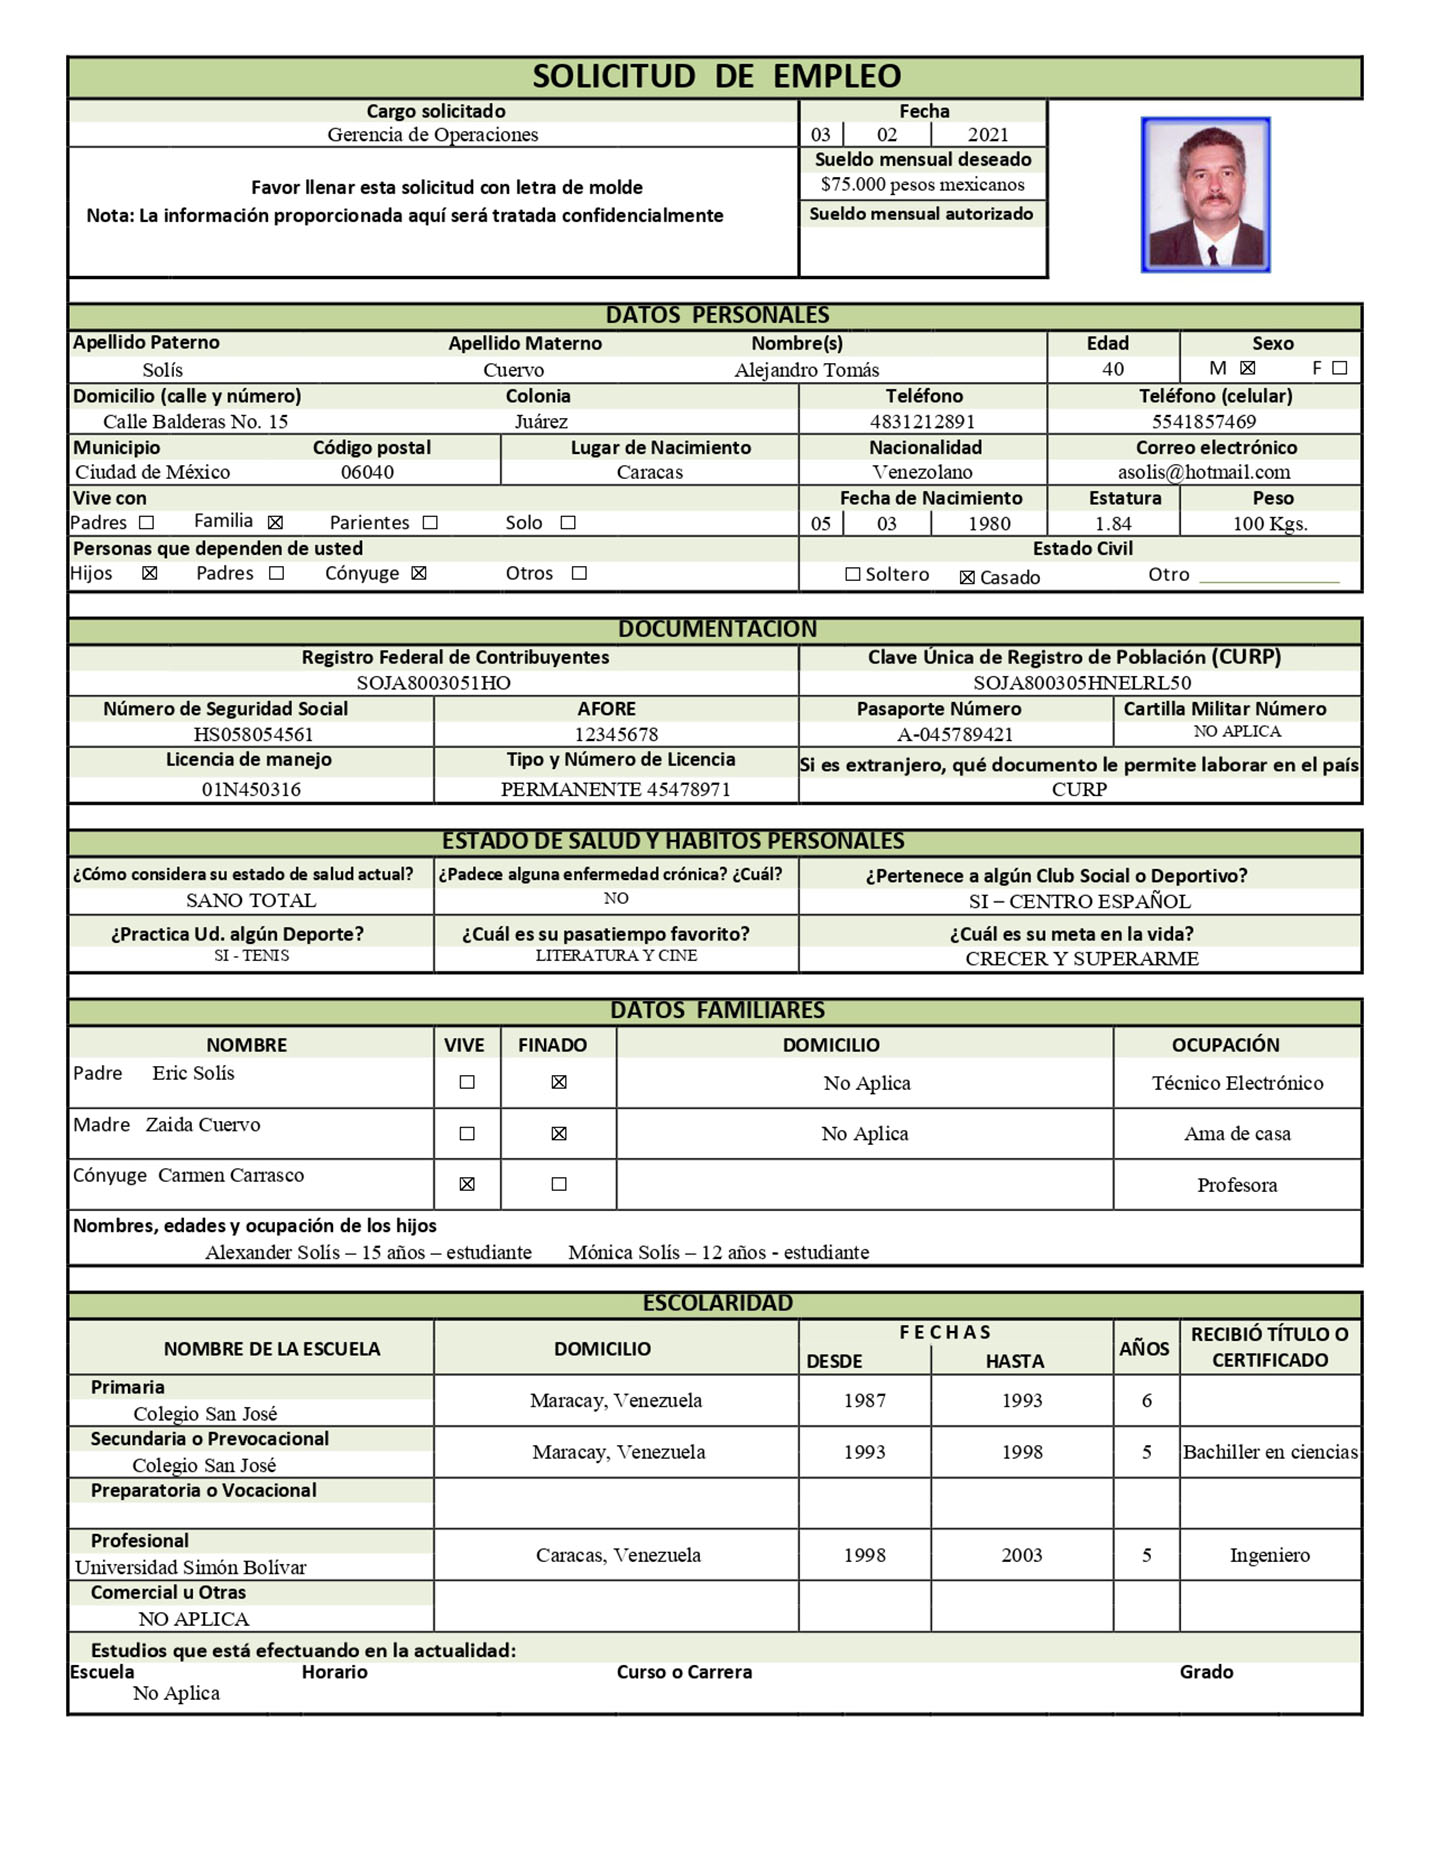

In [32]:
image = Image.open(documentName)
draw = ImageDraw.Draw(image)
image.show()

## 3. Analyze Expense <a id="analyze_expense">
Analiza un documento para buscar relaciones financieras dentro del texto   

In [53]:
documentName = "./img/analyze_expense.png"

with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

response = textract.analyze_expense(
    Document={
        'Bytes': imageBytes
    }
)

In [54]:
from textractprettyprinter.t_pretty_print_expense import get_string, Textract_Expense_Pretty_Print, Pretty_Print_Table_Format
pretty_printed_string = get_string(textract_json=response, output_type=[Textract_Expense_Pretty_Print.SUMMARY], table_format=Pretty_Print_Table_Format.fancy_grid)

In [55]:
print(pretty_printed_string)

╒═══════════════════════════════════╤═══════════════════════╕
│ Key                               │ Value                 │
├───────────────────────────────────┼───────────────────────┤
│ FACTURAR A(ADDRESS)               │ Leda Villareal        │
│                                   │ Virgen Blanca 63      │
│                                   │ 08759 Burgos, Burgos  │
├───────────────────────────────────┼───────────────────────┤
│ (STREET)                          │ Virgen Blanca 63      │
├───────────────────────────────────┼───────────────────────┤
│ (CITY)                            │ Burgos,               │
├───────────────────────────────────┼───────────────────────┤
│ (CITY)                            │ Burgos                │
├───────────────────────────────────┼───────────────────────┤
│ (ZIP_CODE)                        │ 08759                 │
├───────────────────────────────────┼───────────────────────┤
│ (NAME)                            │ Leda Villareal        │
├───────

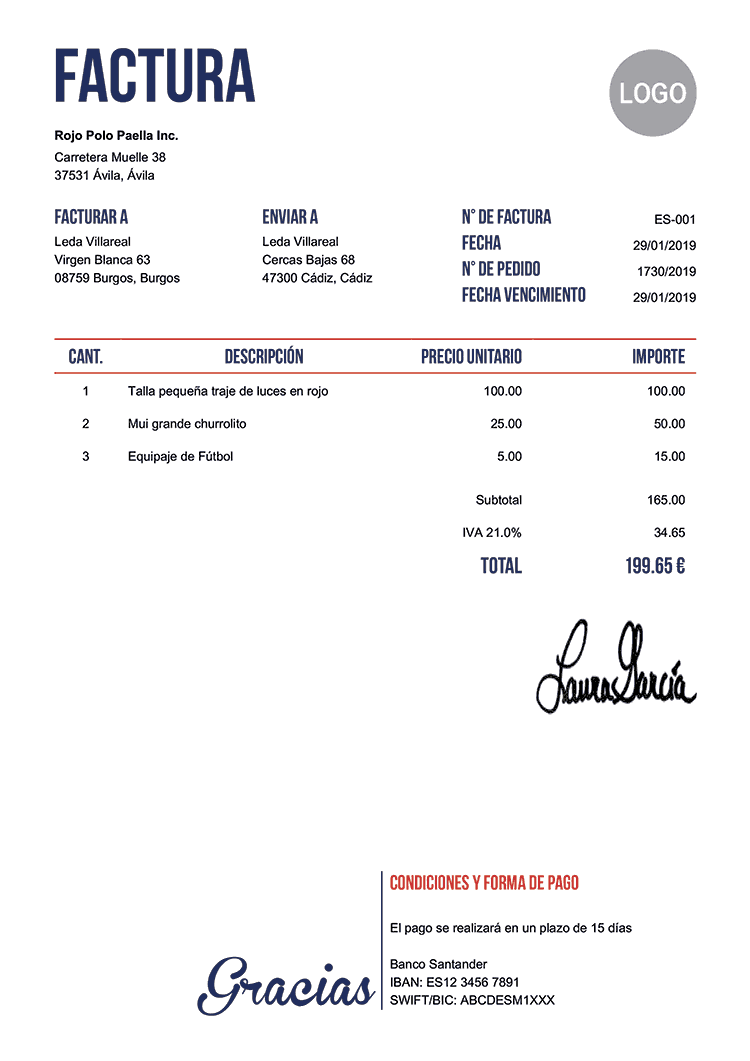

In [56]:
image = Image.open(documentName)
draw = ImageDraw.Draw(image)
image.show()

## 4. Analyze ID <a id="analyze_id">
Analiza documentos de identidad para buscar información relevante.

In [63]:
documentName = "./img/analyze_ID.jpg"

with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

response = textract.analyze_id(
    DocumentPages= [
        {
            'Bytes': imageBytes
        }
    ]
)

In [64]:
import trp.trp2_analyzeid as t2id
t_doc = t2id.TAnalyzeIdDocumentSchema().load(response)

In [65]:
result = t_doc.get_values_as_list()
from tabulate import tabulate
print(tabulate([x[1:3] for x in result]))

-------------------  --------------------
FIRST_NAME           JORGE
LAST_NAME            SOUZA
MIDDLE_NAME
SUFFIX
CITY_IN_ADDRESS      ANYTOWN
ZIP_CODE_IN_ADDRESS  02127
STATE_IN_ADDRESS     MA
STATE_NAME           MASSACHUSETTS
DOCUMENT_NUMBER      820BAC729CBAC
EXPIRATION_DATE      01/20/2020
DATE_OF_BIRTH        03/18/1978
DATE_OF_ISSUE        03/12/2019
ID_TYPE              DRIVER LICENSE FRONT
ENDORSEMENTS         NONE
VETERAN
RESTRICTIONS         NONE
CLASS                D
ADDRESS              100 MAIN STREET
COUNTY
PLACE_OF_BIRTH
MRZ_CODE
-------------------  --------------------


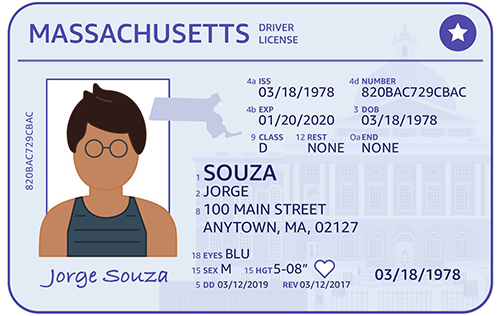

In [66]:
image = Image.open(documentName)
draw = ImageDraw.Draw(image)
image.show()